# Gradient Boosting sample code

copy of gradient boosting [sample code](https://qiita.com/predora005/items/19aebcf3aa05946c7cf4)

## How to use XGBoost: multi class classification using iris data

XGBoost is a library using a type of decision tree algorythm, the GBDT(Gradient boosted decision tree).
This is a guide on the installation and use of said library. 
While multiple programming languages can be used, this guide will show the use with Python.

## What is GBDT
- a type of decision tree model
- a gradient boosted desicion tree

Another famous decision tree model is the random forest, which is summarized in the article below.
https://qiita.com/_tsuru/items/23fdc43ee0e54ec7c87e

## The hallmarks of GBDT
- easily achievable accuracy
- can use loss function values
- can handle numeric data

Since it has a easily achievable accuracy, it's popular in the machine learning competition Kaggle.

## [1] How to use

We will be using the iris data set from scikit-learn. The OS used is Amazon Linux2.

## [1-1] Installation

In Amazon Linux2 the installation is as follows. A guide on the installation can be found on the official website.
https://xgboost.readthedocs.io/en/latest/build.html

Comment:
type `pip3 install xgboost` into the responsible CLI.


## [1-2] Import

In [120]:
import xgboost as xgb

## [1-3] Retrieve the Iris data

There are no particularities to this process. You retrieve the Iris data and create a pandas DataFrame and a Series.


Comment:
iris data represents the input variables, meaning the features the flower has to be able to be classified. 
iris target represents the output variables, meaning what kind of flower it is, encoded as integer. 
Basically, data is the question, target is the answer

In [121]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_target = pd.Series(iris.target)

## [1-4] Create training and testing data sets

There are no particularities here either, `train_test_split` from the scikit-learn package is used to split the data into training and testing data sets.

In [122]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(iris_data, iris_target, test_size = 0.2, shuffle = True)

## [1-5] Convert the data into an XGBoost data type

XGBoost uses `DMatrix` data types. 

`DMatrix` is made up of numpy `ndarray` and pandas `DataFrame` data types, which should not pose a problem.

Details on what type of data can be used can be found in the official documentation below.
https://xgboost.readthedocs.io/en/latest/python/python_intro.html#data-interface

In [123]:
dtrain = xgb.DMatrix(train_x, label = train_y)

## [1-6] Set Parameters

Set each specific parameter. 

In [124]:
param = {'max_depth' : 2, 'eta' : 1, 'objective': 'multi:softmax', 'num_class': 3}

The meaning of each parameter is as follows:
- max_depth = how many trees will be made at a maximum
- eta = learning rate, conrols the step size at each iteration. small nummber prevents overfitting, but requires more boosting rounds
- objective = specifies the learning task and the corresponding learning objective
- num_class = the number of classes

The learning objective described here is "multi:softmax." To learn more about this, check the official documentation.
https://xgboost.readthedocs.io/en/latest/parameter.html

## [1-7] Training

`num_round` represents the number of training rounds.

In [125]:
num_round = 10
bst = xgb.train(param,dtrain, num_round)

## [1-8] Prediction

In [126]:
dtest = xgb.DMatrix(test_x)
pred = bst.predict(dtest)

## [1-9] Confirming Accuaracy

Confirm the accuary with scikit's `accuacy_score`. 

In [127]:
from sklearn.metrics import accuracy_score

score = accuracy_score(test_y, pred)
print('score:{0:.4f}'.format(score))
# 0.9667


score:0.9333


## [1-10] Plot the importance

Visualize which features have contributed in what way to the predicted result.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

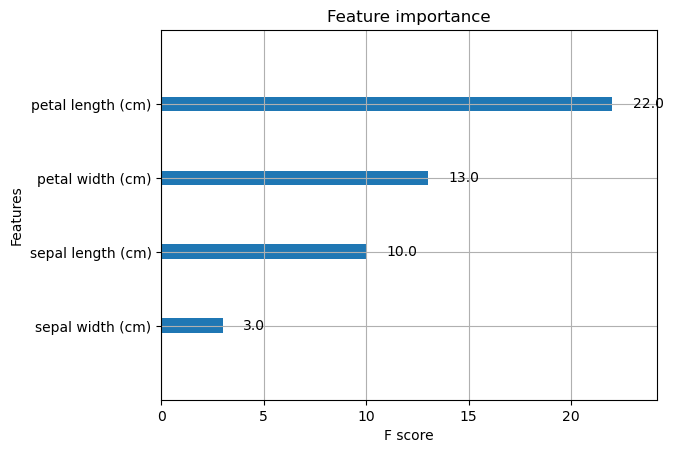

In [128]:
xgb.plot_importance(bst)

## [2] Validation and early stopping during training 

Validation and early stopping during the training proccess is easily accomplished by utilizing the validation data.

## [2-1] Splitting the data

A part of the training data is used for validation.

In [129]:
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.2, shuffle=True)

## [2-2] Creating the DMatrix

In [130]:
dtrain = xgb.DMatrix(train_x, label=train_y)
dvalid = xgb.DMatrix(valid_x, label=valid_y)

## [2-3] Add parameters

When using validation, the "eval_metric" has to be added to the parameters. "eval_metric" defines how the result is evaluated.

In [131]:
param = {'max_depth': 2, 'eta': 0.5, 'objective': 'multi:softmax', 'num_class': 3, 'eval_metric': 'mlogloss'}

## [2-4] Training

The data to be observed is defined in "evallist." The label for the validation data is 'eval,'  for the training data 'train.'

xgb.train now has the addtional parameter `early_stopping_rounds`. If the evaluation has not changed after 5 rounds, the training proccess will be cancelled an the model output. 

In [132]:
evallist = [(dvalid, 'eval'), (dtrain, 'train')];
num_round = 10000;
#bst = xgb.train(param, dtrain, num_round, evals = evallist, early_stopping_rounds=5);
bst = xgb.XGBClassifier(
    objective='multi:softprob',
    max_depth=5,
    eta=0.2,
    gamma=4,
    min_child_weight=6,
    subsample=0.7,
    num_round=10000,
    eval_metric='mlogloss'
)

# [0]   eval-mlogloss:0.61103   train-mlogloss:0.60698
# Multiple eval metrics have been passed: 'train-mlogloss' will be used for early stopping.
# 
# Will train until train-mlogloss hasn't improved in 5 rounds.
# [1]   eval-mlogloss:0.36291   train-mlogloss:0.35779
# [2]   eval-mlogloss:0.22432   train-mlogloss:0.23488
# 
# 〜〜〜 途中省略 〜〜〜
# 
# Stopping. Best iteration:
# [1153]    eval-mlogloss:0.00827   train-mlogloss:0.01863


## [2-5] Confirming the result of the validation

In [133]:
#print('Best Score:{0:.4f}, Iteration:{1:d}, Ntree_limit:{2:d}'.format(bst.best_score,bst.best_iteration,bst.best_ntree_limit))
print('Best Score:{0:.4f}, Iteratin:{1:d}, Ntree_Limit:{2:d}'.format(
     bst.best_score, bst.best_iteration, bst.best_ntree_limit))
# Best Score:0.0186, Iteratin:1153, Ntree_Limit:1154


NotFittedError: need to call fit or load_model beforehand

## [2-6] Prediction

Performing predictions with the model that had the best results out of the validation results.

In [ ]:
dtest = xgb.DMatrix(test_x)
pred = ypred = bst.predict(dtest, ntree_limit = bst.best_ntree_limit)

## Finally

For people with experience in machine learning, using the pandas DataFrame and Series might have seemed easy.

This example was about multiple class classification, but can just as well be used for binary classification and regression. This approach can be helpful in many different situations.